In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
x=np.array([10,20,30,40,50,60,70,80,90])
y=np.array([0.98,1.98,2.98,3.97,4.95,5.95,6.93,7.93,8.91])

In [3]:
def delta(x):
    return len(x)*np.sum(x**2)-(np.sum(x))**2
def intercepto(x,y):
    c=(np.sum(x**2)*np.sum(y)-np.sum(x)*np.sum(x*y))
    return c/delta(x)
def pendiente(x,y):
    m= len(x)*np.sum(x*y)-np.sum(x)*np.sum(y)
    return m/delta(x)


In [4]:
def alpha_CU(x,y):
    a=np.sum((y-pendiente(x,y)*x-intercepto(x,y))**2)
    return np.sqrt(a/(len(x)-2))
def alpha_C(x,y):
    a=np.sum(x**2)
    a2=a/delta(x)
    return alpha_CU(x,y)*np.sqrt(a2)
def alpha_M(x,y):
    return alpha_CU(x,y)*np.sqrt(len(x)/delta(x))

In [11]:
c=intercepto(x,y)

In [12]:
m=pendiente(x,y)

In [7]:
def func(x, m, c):
    return m*x+c

In [13]:
a_c=alpha_C(x,y)

In [15]:
a_M=alpha_M(x,y)

In [10]:
def residuo(x,y,m,c):
    return y-func(x,m,c)

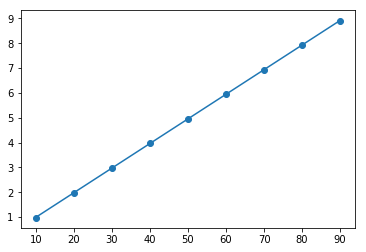

In [16]:
plt.figure()
plt.scatter(x,y)
plt.plot(x, func(x,m,c))

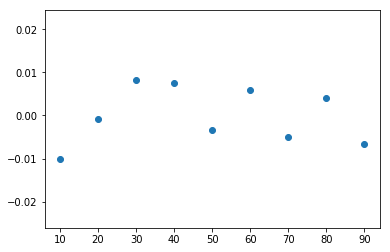

In [18]:
plt.figure()
plt.scatter(x, residuo(x,y,m,c))

In [20]:
a_CU=alpha_CU(x,y)
a_CU

0.007154752000627286